# My first ML project

## Imports

In [1]:
import pandas as pd
# To visualize data
from matplotlib import pyplot as plt
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#To choose the best model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# To train and predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


## Loading the data
To download the data from UCI Machine Learning Repository I used the following command in my macos terminal: </br>curl -o iris_dataset.csv https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 

In [2]:
iris_data = pd.read_csv('../data/iris_dataset.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

### Summarize the Dataset
Explore the data both with descriptive statistics and data visualization.

### Descriptive statistics
Let's take  a look at the data:

In [3]:
# Pick at the data
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dimension of the Dataset
iris_data.shape

(150, 5)

In [5]:
# Statistical summary
# print a summary of the data in Melbourne data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Data visualization
We are going to look at two types of plots:

1 - Univariate plots to better understand each attribute. </br>
2 - Multivariate plots to better understand the relationships between attributes.

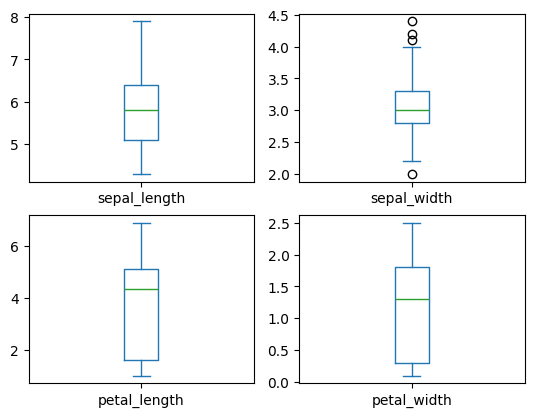

In [7]:
# Create a boxplot
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

The shape of the boxplot shows how the data is distributed and it also shows any outliers. <br/>
We can also create a histogram of each input variable to get an idea of the distribution.

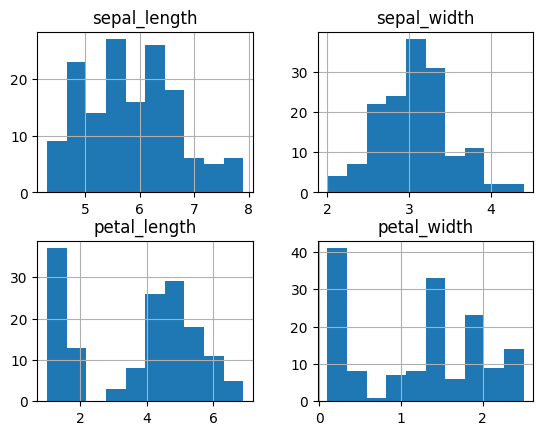

In [8]:
# histograms
iris_data.hist()
plt.show()

We can notice that at least two of the input variables respect the Gaussian Distribution. </br>
This is good to notice because then we can choose a set of models that can fulfill this shape.

## Evaluate Algorithms

### Create a validation Dataset
We will split the iris_data into two, 80% of which we will use to train, evaluate, and select among our models, and 20% that we will hold back as a validation dataset. </br>
To split my data into training and testing sets in Python, I used scikit-learn, which provides convenient functions for this purpose: train_test_split.

In [9]:
# Features (input variables)
X = iris_data.drop('class', axis=1)

# Target variable (output variable)
y = iris_data['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
print("Training Data - X_train shape:", X_train.shape, " y_train shape:", y_train.shape)
print("Testing Data - X_test shape:", X_test.shape, " y_test shape:", y_test.shape)

Training Data - X_train shape: (120, 4)  y_train shape: (120,)
Testing Data - X_test shape: (30, 4)  y_test shape: (30,)


### Build and evaluate the models
We don’t know which algorithms would be good for this problem so we need to check in some different algorithms.

Let’s test 6 of them:
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).


This is a good mixture of simple linear (LR and LDA) and nonlinear (KNN, CART, NB and SVM) algorithms.



Below we will create a python dictionary with our algorithms so we can use it later:

In [11]:
# Create instances of classifiers
classifiers = {
    'LR': LogisticRegression(solver='liblinear', multi_class='ovr'),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(),
    'CART': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'SVM': SVC(gamma='auto')
}

### K-Fold cross-validation
Before testing our algorithms to know which one is the best fit for our dataset, we will use the K-Fold cross-validation technique to separate our dataset.

- **K-Fold Cross-Validation**: is a technique used in ML to assess how well our model does on unseen data.

Some benefits of using it:
- **Small Dataset**: It is a really good approach especially because we have a small dataset. K-Fold Cross-Validation allows us to maximize the use of available data. It allows us to assess our model's performance from various perspectives without needing additional data;
- **Model Comparison**: It allows us to use the same parts of the data for every model, so we can compare equally. We can apply the same cross-validation process to multiple models or settings and determine which one performs better on average.

In [12]:
# Create a StratifiedKFold cross-validation object
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

results = []
names = []

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    accuracy = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(accuracy)
    names.append(name)
    print(f'{name}: Mean Accuracy = {accuracy.mean():.2f}, Std Dev = {accuracy.std():.2f}')

LR: Mean Accuracy = 0.94, Std Dev = 0.07
LDA: Mean Accuracy = 0.97, Std Dev = 0.04
KNN: Mean Accuracy = 0.96, Std Dev = 0.04
CART: Mean Accuracy = 0.95, Std Dev = 0.04
NB: Mean Accuracy = 0.95, Std Dev = 0.06
SVM: Mean Accuracy = 0.98, Std Dev = 0.03


We can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.98 or 98%.

Remember that we split our data in 10 times so for each model we have 10 accuracy results. So let's plot our results to better visualize the performance of each one:

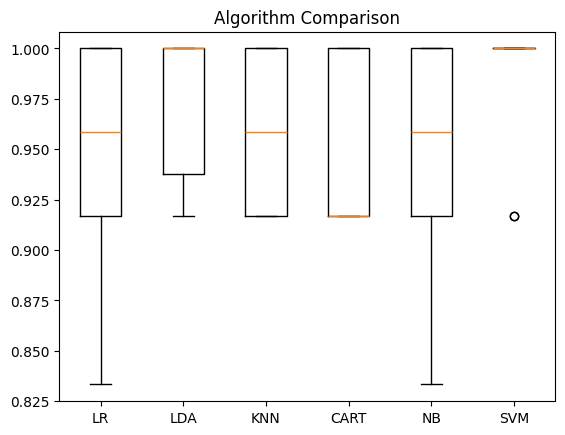

In [13]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

So we are now sure that SVM is the best choice to fit our dataset. Let's make some predictions then.

## Make Predictions

Now we want to get an idea of the accuracy of the model on our test set.

In [15]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluate predictions
Compare the expected results in the validation set with the predictions from our model, then calculate classification accuracy, as well as a confusion matrix and a classification report.

In [16]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Here's what each of the metrics and results we print above means:

- **Accuracy Score (0.967):** It means that our SVC model correctly classified about 96.7% of the test samples;
- **Confusion Matrix:** The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each class. I have a 3x3 matrix for the three classes (Iris-setosa, Iris-versicolor, and Iris-virginica). We can read like this: I correctly classified 11 instances of Iris-setosa, 12 instances of Iris-versicolor, and 6 instances of Iris-virginica;
- **Classification Report:** The classification report provides more detailed information, including precision, recall, and F1-score for each class, as well as the overall accuracy.
  -  **Precision** measures the ability of the model to avoid false positives;
  -  **Recall (or sensitivity)** measures the model's ability to correctly identify positive samples;
  -  **F1-score** provides a balance between precision and recall.
- For Iris-setosa, we achieved perfect precision, recall, and F1-score, it means that all Iris-setosa samples were correctly classified;
- For Iris-versicolor, we had a slightly lower recall (0.92), suggesting that our model missed some instances. However, the precision (1.00) is excellent, indicating a low rate of false positives;
- For Iris-virginica, we had a perfect recall, but a lower precision (0.86). This means that while the model correctly identified all Iris-virginica samples, there were a few false positives.

## Further do

Investigate the misclassifications for Iris-versicolor and Iris-virginica to understand the reasons behind them and potentially improve our model.